# **Statistics**
This is a branch of maths in charge of getting and organizing data, it is also in charge of getting information based on this data.

# **Types of variables**
Statistics have to work with variables(something mutable), and it has some types of variables, such as qualitative and quantitative variables. Both of them have their partitions.

# Qualitative
Qualitative variables are variables that **can not be measured with numbers**, such as **names, rank, major, etc.** It has two important partitions:

- **Qualitative Nominal**.- It cannot be sorted.**(ex. Names, civil status)**
- **Qualitative Ordinal**.- It is possible to sort it.**(ex. rank)**

# Quantitative
Quantitative variables are variables that **can be measured with numbers**, such as **age, economical measures, height, etc.** It has two important partitions:

- **Quantitative Discreet**.- It takes finite numbers.**(ex. Age)**
- **Quantitative Continous**.- It takes infinite numbers.**(ex. Height, because it is not defined a measure of the height of something could have an infinite number of decimals)**

# Contingency table

Contingency tables are a way to order multiple variables in a useful way, an other way to call contingency tables is as pivot table. Contingency tables are very useful to organiza data and get insigns about that data.

In [2]:
import pandas as pd
import numpy as np
import random

data= {'survive': [], 'genre': [], 'class': []}

for _ in range(1, 2000, 1):

  data['survive'].append(random.choice([0, 1]))
  data['genre'].append(random.choice(['male', 'female']))
  data['class'].append(random.choice([1,2,3]))

df= pd.DataFrame(data)
df

,survive,genre,class
0,0,male,3
1,0,female,3
2,1,male,1
3,1,female,1
4,0,male,3
...,...,...,...
1994,0,female,3
1995,1,male,2
1996,1,female,2
1997,0,male,3


There is an example of table of contingency, something important is using margins, margins are the total number of items per each variable.

In [3]:
df.pivot_table(values='survive', index='genre', columns='class', aggfunc= np.sum, margins= True)

class,1,2,3,All
genre,,,,
female,153,171,153,477
male,179,167,130,476
All,332,338,283,953


# **Frequency Distribution**
It is a way to sort data to proceed with statistical analysis. Also, it has some specific columns:
$$x_{i} \hspace{1cm} f_{i} \hspace{1cm} f_{r}  \hspace{1cm} \%_{i} \hspace{1cm} F$$
- The first one is about the data.
- The second one is the number of times that data occurs.
- The third one is the result of the next formula: $$\frac{f_{i}}{\sum{f_{i}}}$$
So it is the portion of this value against the total.
- The fourth one is: $$f_{r}*100$$
So it is the percentage of this value.
- The fifth one is the summation of all data values.

# Frequency Distribution(Example)
Let's imagine we want to know how many children have our neighbors, so we think they have a maximum of 6 children. And once we go to ask our neighbors to give us the information they give us the **'f' array**.

In [4]:
import pandas as pd

x = [0,1,2,3,4,5,6]
f = [15, 12, 13, 6, 3, 1, 0]
sum = 0
fr = []

for i in f:
  
  sum += i

for j in f:

  fr.append(j/sum)

perc = [x*100 for x in fr]

F = [15, 27, 40, 46, 49, 50, 50]

data = {
    'xi': x,
    'fi': f,
    'fr': fr,
    'percentage': perc,
    'F': F
}

df = pd.DataFrame(data)

df.set_index('xi')

,fi,fr,percentage,F
xi,,,,
0,15,0.30,30.0,15
1,12,0.24,24.0,27
2,13,0.26,26.0,40
3,6,0.12,12.0,46
4,3,0.06,6.0,49
5,1,0.02,2.0,50
6,0,0.00,0.0,50


<BarContainer object of 7 artists>

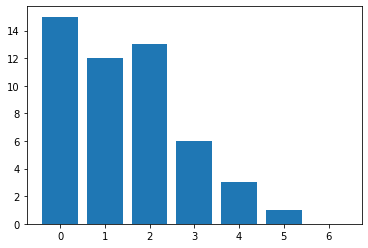

In [5]:
#As an example, by this way, we know that 26% of our neighbors have 2 children. Also, we can graphic it.

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(df['xi'], df['fi'])

# **Frequency distribution for continous values**
As continuous values are not finite numbers we have to use another structure, that structure is also designed for great volumes of data.

# Frequency distribution for continous values(Example)
Just imagine we have to know the height of many students in a classroom of 33 persons, note **that height is a continuous value and 33 could be considered as a large sample.** So here we have a minimum value of 1.54 and a maximum value of 1.70, now we have to define the number of intervals, in this case, we are going to use 5, then let's calculate $$1.70-1.54=0.16$$
So 0.16 is the distance between the maximum and minimum heights, then we have to search for a number that can be divided by 5(our intervals) and modify the distance between max. and min. **The minimum value cannot be higher or the maximum value cannot be smaller** so in this case let's modify both, we have to subtract 0.02 at the minimum value: $$1.54-0.02=1.52$$
Great then we have to add 0.02 for the maximum value: $$1.70+0.02=1.72$$
We have a gap of 0.20 that's a multiple of 5, then just let's divide it: $$\frac{0.20}{5}=0.04$$
So the intervals are going to be every **0.04** decimals.
$$1.52-1.56 \hspace{1cm} 1.56-1.60 \hspace{1cm} .... \hspace{1cm} 1.68-1.72$$
Then everything becomes the same. So this time we just going to use the column: $$f_{i}$$ 

In [6]:
import pandas as pd

data = {
    'xi': ['(1.52-1.56)', '(1.56-1.60)', '(1.60-1.64)', '(1.64-1.68)', '(1.68-1.72)'],
    'fi': [8, 8, 10, 4, 3]
}

df = pd.DataFrame(data)
df

,xi,fi
0,(1.52-1.56),8
1,(1.56-1.60),8
2,(1.60-1.64),10
3,(1.64-1.68),4
4,(1.68-1.72),3


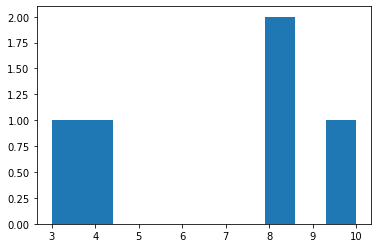

In [7]:
# We can also graphic it as a histogram similar to a bar chart

import matplotlib.pyplot as plt

plt.hist(df['fi'])
plt.show()

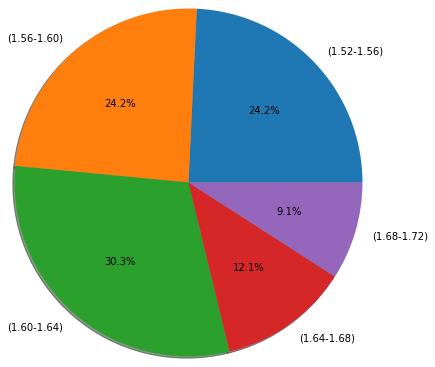

In [8]:
# To finish we can also use a pie chart

import matplotlib.pyplot as plt

plt.pie(df['fi'], labels=df['xi'], shadow=True, autopct='%1.1f%%', radius=2)

plt.show()